<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/Practica25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practica #25. Arbol de Decisión 1

Carga de Datos

In [38]:
import pandas as pd

# dtype_spec = {'V19': 'object'}
df = pd.read_csv("/content/creditcardFraud.csv")
display(df)

/tmp/ipython-input-1399178894.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/creditcardFraud.csv")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,yes
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,yes
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,yes
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,yes
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52580,69932,-0.389657,-0.843823,2.726189,-1.091468,-2.220183,0.762701,-1.406808,0.318091,-1.016087,...,-0.052796,0.670994,-0.060150,0.596569,-0.614352,-0.106089,0.024185,0.168972,37.00,no
52581,165609,1.792511,-0.060020,-1.952539,1.358504,0.462704,-1.366440,1.006530,-0.556519,-0.188909,...,0.213120,0.428346,-0.131228,-0.002651,0.411649,-0.496551,-0.054349,-0.039374,144.00,no
52582,65083,-2.743015,-3.864348,1.203449,-0.608998,3.730415,-3.088851,-1.926243,-0.059978,-0.893562,...,0.612838,0.889011,0.582325,0.140406,-0.199204,-0.340716,-0.126777,0.026456,20.00,no
52583,14492,1.018584,-0.275912,0.767432,-0.003350,0.008897,1.513565,-0.895748,0.559504,1.503289,...,0.100861,0.654582,0.103555,-1.009568,-0.147288,1.143621,-0.023484,-0.019946,14.95,no


Análisis de Datos: Realiza un análisis descriptivo y visualiza la distribución de las características.

In [39]:
print("Tipo de dato", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    52585 non-null  int64  
 1   V1      52585 non-null  float64
 2   V2      52585 non-null  float64
 3   V3      52585 non-null  float64
 4   V4      52585 non-null  float64
 5   V5      52585 non-null  float64
 6   V6      52585 non-null  float64
 7   V7      52585 non-null  float64
 8   V8      52585 non-null  float64
 9   V9      52585 non-null  float64
 10  V10     52585 non-null  float64
 11  V11     52585 non-null  float64
 12  V12     52585 non-null  float64
 13  V13     52585 non-null  float64
 14  V14     52585 non-null  float64
 15  V15     52585 non-null  float64
 16  V16     52585 non-null  float64
 17  V17     52585 non-null  float64
 18  V18     52585 non-null  float64
 19  V19     52585 non-null  object 
 20  V20     52584 non-null  float64
 21  V21     52584 non-null  float64
 22

In [40]:
df['V19'] = pd.to_numeric(df['V19'], errors='coerce')
df['class'] = df['class'].map({'no': 0, 'yes': 1})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    52585 non-null  int64  
 1   V1      52585 non-null  float64
 2   V2      52585 non-null  float64
 3   V3      52585 non-null  float64
 4   V4      52585 non-null  float64
 5   V5      52585 non-null  float64
 6   V6      52585 non-null  float64
 7   V7      52585 non-null  float64
 8   V8      52585 non-null  float64
 9   V9      52585 non-null  float64
 10  V10     52585 non-null  float64
 11  V11     52585 non-null  float64
 12  V12     52585 non-null  float64
 13  V13     52585 non-null  float64
 14  V14     52585 non-null  float64
 15  V15     52585 non-null  float64
 16  V16     52585 non-null  float64
 17  V17     52585 non-null  float64
 18  V18     52585 non-null  float64
 19  V19     52584 non-null  float64
 20  V20     52584 non-null  float64
 21  V21     52584 non-null  float64
 22

In [41]:
df = df.dropna()

In [42]:
duplicados = df.duplicated().sum()
print("Datos duplicados", duplicados)

Datos duplicados 2959


Preprocesamiento:

In [43]:
import numpy as np

# Estadísticas descriptivas
print('El EDA de los datos es: ')
print(df.describe())
print('\n')

#Obtenemos la moda de cada una de las columnas(el describe no la ofrece por si sola)
# Obtener la moda de cada columna
moda = df.mode().iloc[0]  # .iloc[0] toma solo el primer valor en caso de múltiples modas

# Mostrar la moda de cada columna
print("Moda de cada columna:")
print(moda)
print('\n')

# Verificar valores faltantes
print("Valores faltantes:")
print(df.isnull().sum())

El EDA de los datos es: 
                Time            V1            V2            V3            V4  \
count   52584.000000  52584.000000  52584.000000  52584.000000  52584.000000   
mean    94874.322417     -0.038840      0.028590     -0.062238      0.034550   
std     47422.644808      2.069173      1.692657      1.746829      1.487085   
min         7.000000    -37.558067    -35.616754    -32.965346     -5.231828   
25%     54320.000000     -0.946793     -0.593373     -0.916059     -0.844120   
50%     85052.500000     -0.006287      0.071785      0.161786     -0.013965   
75%    139252.750000      1.318752      0.819688      1.013994      0.761465   
max    172788.000000      2.454930     22.057729      3.945276     12.672760   

                 V5            V6            V7            V8            V9  \
count  52584.000000  52584.000000  52584.000000  52584.000000  52584.000000   
mean      -0.014314     -0.009272     -0.038061      0.003346     -0.021765   
std        1.4745

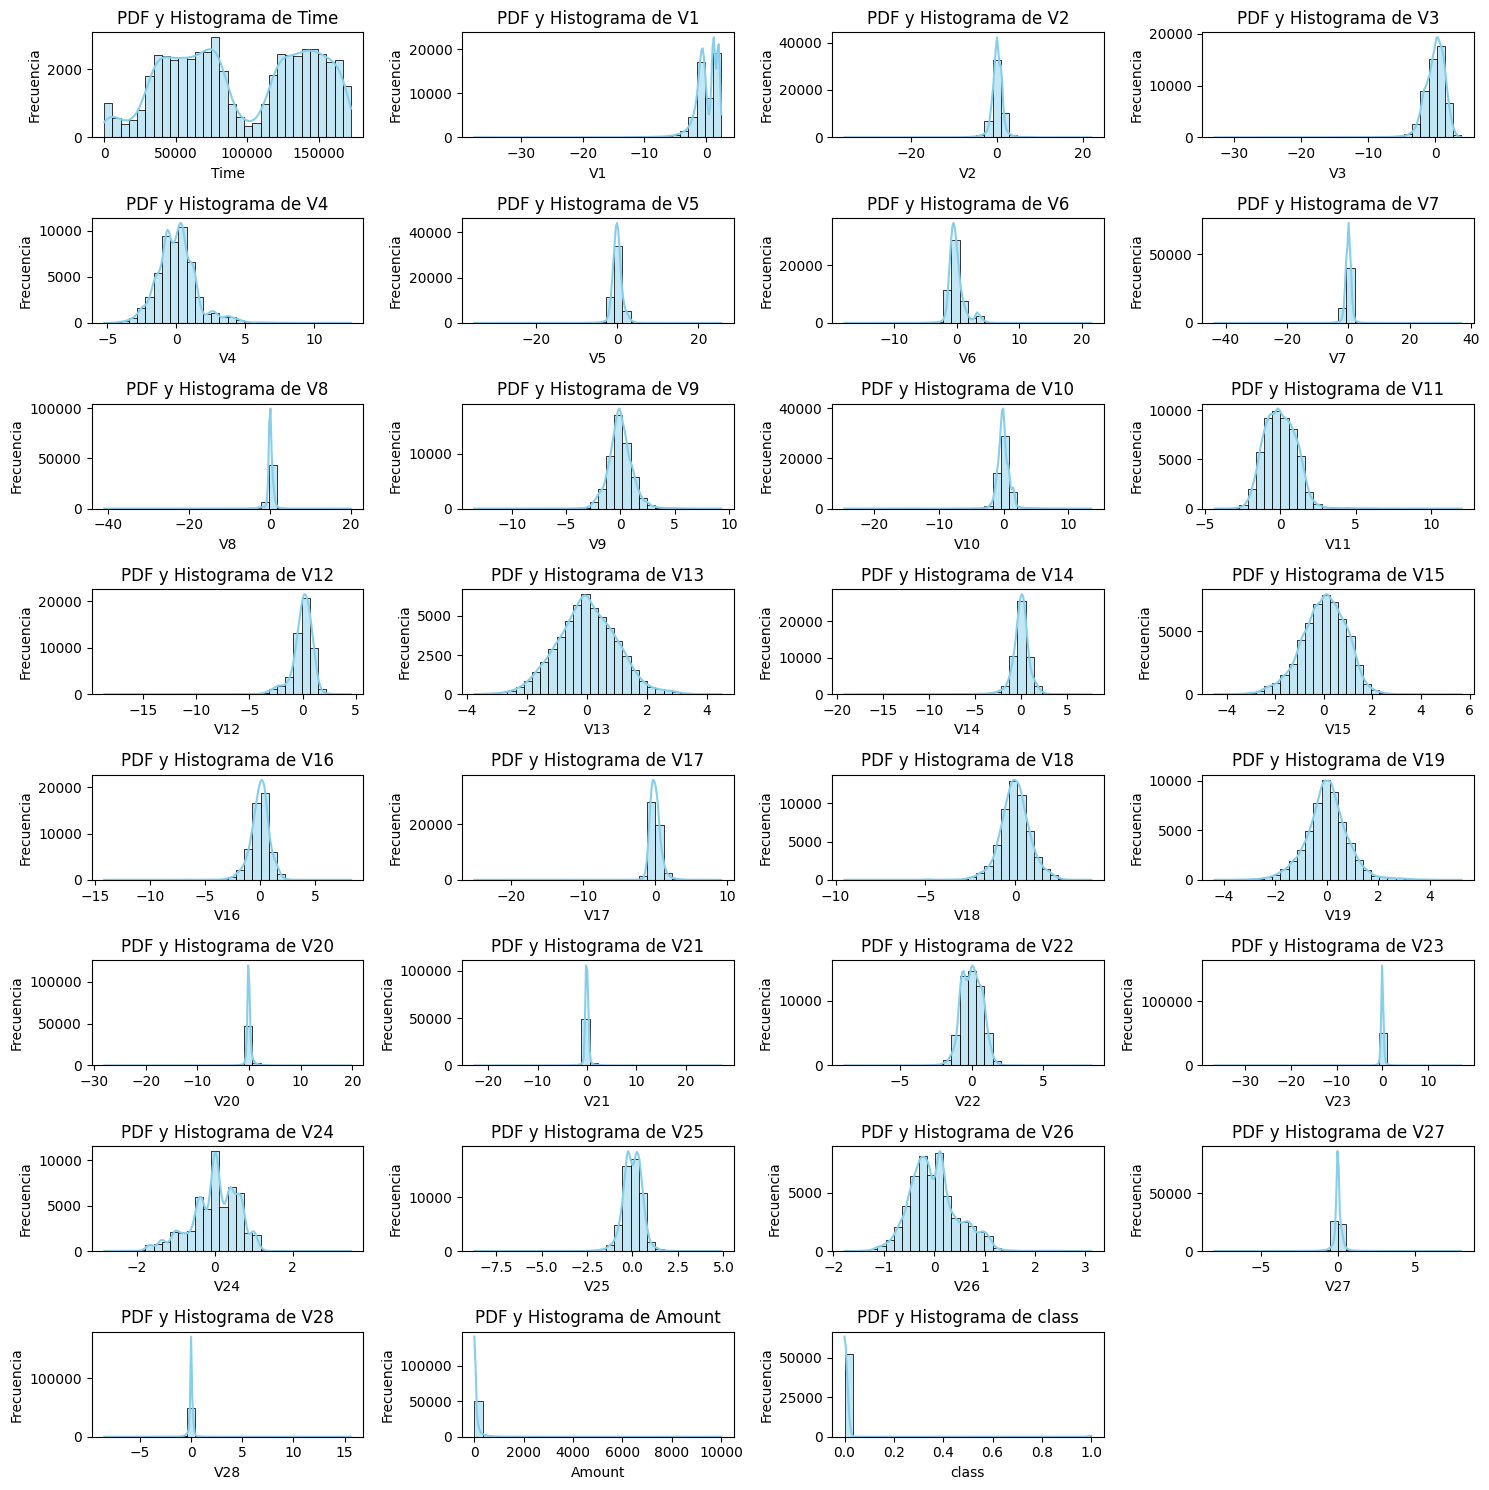

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una lista de las columnas del dataset
columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(15, 15))
for i, col in enumerate(columns, 1):
    plt.subplot(8, 4, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



División de Conjuntos:

In [46]:
# df['class'] = df['class'].map({'no': 0, 'yes': 1})
y = df['class']
X = df.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36808 entries, 48441 to 15796
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    36808 non-null  int64  
 1   V1      36808 non-null  float64
 2   V2      36808 non-null  float64
 3   V3      36808 non-null  float64
 4   V4      36808 non-null  float64
 5   V5      36808 non-null  float64
 6   V6      36808 non-null  float64
 7   V7      36808 non-null  float64
 8   V8      36808 non-null  float64
 9   V9      36808 non-null  float64
 10  V10     36808 non-null  float64
 11  V11     36808 non-null  float64
 12  V12     36808 non-null  float64
 13  V13     36808 non-null  float64
 14  V14     36808 non-null  float64
 15  V15     36808 non-null  float64
 16  V16     36808 non-null  float64
 17  V17     36808 non-null  float64
 18  V18     36808 non-null  float64
 19  V19     36808 non-null  float64
 20  V20     36808 non-null  float64
 21  V21     36808 non-null  float64
 22 

Entrenamiento:

In [75]:
clf = DecisionTreeClassifier(criterion='gini', max_depth = 2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15618
         1.0       0.86      0.81      0.84       158

    accuracy                           1.00     15776
   macro avg       0.93      0.90      0.92     15776
weighted avg       1.00      1.00      1.00     15776

[[15598    20]
 [   30   128]]


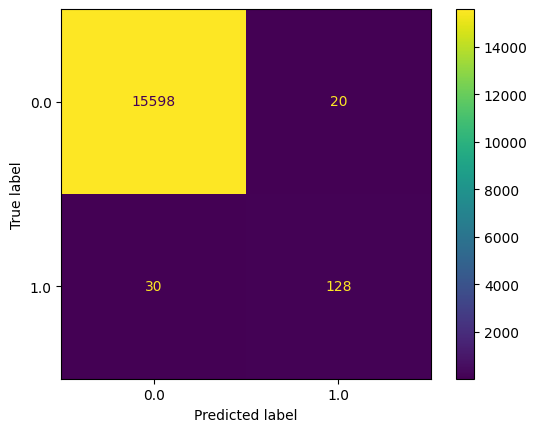

In [76]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

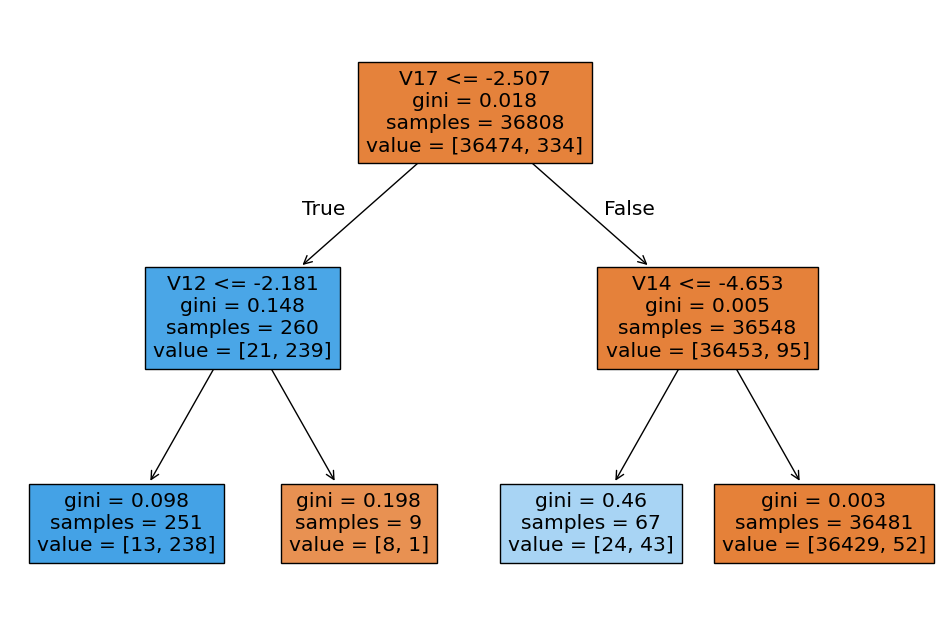

In [72]:
plt.figure(figsize=(12,8))
# Use X.columns.tolist() to get feature names and remove class_names for regressor
plot_tree(clf, filled=True, feature_names=X.columns.tolist())
plt.show()

Optimización y Evaluación:

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

depths = [1, 2, 3, 5, 7, 10, None]
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
for d in depths:
    clf_cv = DecisionTreeClassifier(criterion='entropy',max_depth=d, random_state=42)

    results = cross_validate(clf_cv, X, y, cv=skf, scoring=scoring)
    print(f"Profundidad: {d}")
    print("Resultados:")
    for metric in scoring:
      print(f"{metric}: {results['test_' + metric].mean():.4f}")

Profundidad: 1
Resultados:
accuracy: 0.9958
precision_macro: 0.8831
recall_macro: 0.8922
f1_macro: 0.8870
Profundidad: 2
Resultados:
accuracy: 0.9977
precision_macro: 0.9655
recall_macro: 0.9073
f1_macro: 0.9342
Profundidad: 3
Resultados:
accuracy: 0.9977
precision_macro: 0.9653
recall_macro: 0.9042
f1_macro: 0.9322
Profundidad: 5
Resultados:
accuracy: 0.9976
precision_macro: 0.9693
recall_macro: 0.8961
f1_macro: 0.9293
Profundidad: 7
Resultados:
accuracy: 0.9975
precision_macro: 0.9635
recall_macro: 0.9001
f1_macro: 0.9289
Profundidad: 10
Resultados:
accuracy: 0.9968
precision_macro: 0.9236
recall_macro: 0.9018
f1_macro: 0.9120
Profundidad: None
Resultados:
accuracy: 0.9963
precision_macro: 0.8981
recall_macro: 0.9025
f1_macro: 0.8999
